In [1]:
import tensorflow as tf
import numpy as np

In [2]:
from tensorflow.python.framework import ops
from tensorflow.python.framework import dtypes
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.utils.extmath import softmax

In [3]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2174174833876213459, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 10915096167
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16203548626721185222
 physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:02:00.0, compute capability: 6.1"]

In [4]:
from PIL import Image
import numpy as np

def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data

def save_image( npdata, outfilename ) :
    img = Image.fromarray( np.asarray( np.clip(npdata,0,255), dtype="uint8"), "L" )
    img.save( outfilename )

In [5]:
train_size = 20000 #20000 #
test_size=1000
num_trainfiles = int(train_size/2)
num_testfiles = int(test_size/2)
train_filenames = ['./train/cat.%d.jpg' %i for i in range(1,num_trainfiles)]
train_filenames.extend(['./train/dog.%d.jpg' %i for i in range(1,num_trainfiles)])

In [6]:
test_filenames = ['./train/cat.%d.jpg' %i for i in range(num_trainfiles, num_trainfiles+num_testfiles)]
test_filenames.extend(['./train/dog.%d.jpg' %i for i in range(num_trainfiles, num_trainfiles+num_testfiles)])

In [7]:
INITIAL_LEARNING_RATE=0.0001
NUM_EXAMPLES_PER_EPOCH_FOR_TRAIN = len(train_filenames)
MOVING_AVERAGE_DECAY = 0.9999     # The decay to use for the moving average.
batch_size=32
NUM_EPOCHS_PER_DECAY = 10
LEARNING_RATE_DECAY_FACTOR = 0.88
num_batches_per_epoch = NUM_EXAMPLES_PER_EPOCH_FOR_TRAIN / batch_size
decay_steps = int(num_batches_per_epoch * NUM_EPOCHS_PER_DECAY)
IM_HEIGHT=128 #256
IM_WIDTH=128 #256
NUM_CLASSES=2

In [8]:
data = load_image('./train/cat.10.jpg')
#for i range(12500)

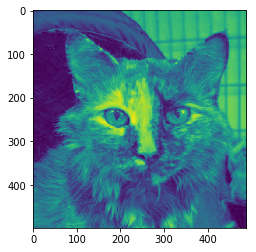

In [9]:
plt.imshow(data[:,:,2])

In [10]:
from PIL import Image
imdata = Image.open('./train/cat.10.jpg')
imdata.resize((256,256), resample=Image.BICUBIC)
imdata.load()
data = np.asarray( imdata, dtype="int32" )

In [11]:
imagesData = np.zeros((len(train_filenames), IM_WIDTH, IM_HEIGHT, 1), dtype="float32")
for idx,fn in enumerate(train_filenames):
    imdata = Image.open(fn)
    imdata = imdata.resize((IM_WIDTH,IM_HEIGHT), resample=Image.BICUBIC)
    imdata.load()
    data = np.asarray(imdata, dtype="float32")
    imagesData[idx,:,:,0] = data[:,:,1]
    if (idx%1000)==0:
        print("loaded ",idx)

loaded  0
loaded  1000
loaded  2000
loaded  3000
loaded  4000
loaded  5000
loaded  6000
loaded  7000
loaded  8000
loaded  9000
loaded  10000
loaded  11000
loaded  12000
loaded  13000
loaded  14000
loaded  15000
loaded  16000
loaded  17000
loaded  18000
loaded  19000


In [12]:
import sys
sys.getsizeof(imagesData)/1000000000

1.310589072

In [13]:
imagesLabel = np.zeros((len(train_filenames),2))
imagesLabel[:num_trainfiles-1,1] = 1
imagesLabel[num_trainfiles-1:,0] = 1

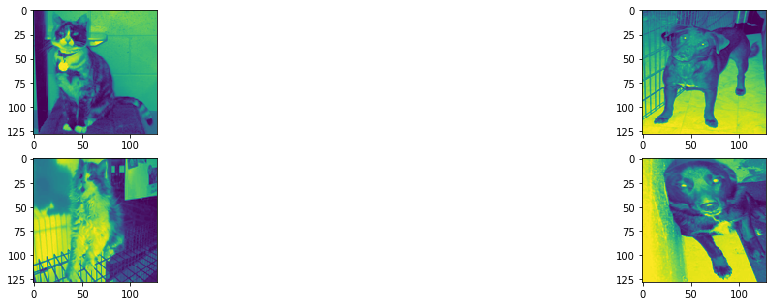

In [18]:
plt.figure(figsize=(20,5))
plt.subplot(2,2,1)
_=plt.imshow(imagesData[num_trainfiles-2,:,:,0])
plt.subplot(2,2,2)
_=plt.imshow(imagesData[num_trainfiles-1,:,:,0])
plt.subplot(2,2,3)
_=plt.imshow(testImagesData[num_testfiles-1,:,:,0])
plt.subplot(2,2,4)
_=plt.imshow(testImagesData[num_testfiles,:,:,0])

In [15]:
testImagesData = np.zeros((len(test_filenames), IM_WIDTH, IM_HEIGHT, 1), dtype="float32")
for idx,fn in enumerate(test_filenames):
    testimdata = Image.open(fn)
    testimdata = testimdata.resize((IM_WIDTH,IM_HEIGHT), resample=Image.BICUBIC)
    testimdata.load()
    data = np.asarray(testimdata, dtype="float32")
    testImagesData[idx,:,:,0] = data[:,:,1]
    if (idx%100)==0:
        print("loaded ",idx)

loaded  0
loaded  100
loaded  200
loaded  300
loaded  400
loaded  500
loaded  600
loaded  700
loaded  800
loaded  900


In [16]:
len(testImagesData), num_testfiles

(1000, 500)

In [17]:
testImagesLabel = np.zeros((len(test_filenames),2))
testImagesLabel[:num_testfiles,1] = 1
testImagesLabel[num_testfiles:,0] = 1

In [19]:
imagesLabel.shape

(19998, 2)

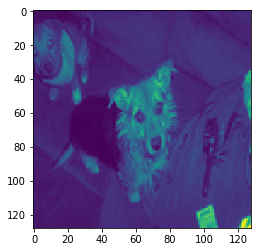

In [20]:
plt.imshow(data[:,:,1])

In [ ]:
train_images = ops.convert_to_tensor(train_filenames, dtype=dtypes.string)
train_labels = ops.convert_to_tensor(train_labelnames, dtype=dtypes.int32)

#filename_queue = tf.train.string_input_producer(tf.train.match_filenames_once("./images/*.jpg"))
filename_queue = tf.train.string_input_producer(train_filenames)

In [ ]:
reader = tf.WholeFileReader()
key, value = reader.read(filename_queue)
image = tf.image.decode_jpeg(value)
#image_label = tf.train.

In [ ]:
batch_x, batch_y = tf.train.batch(tensors=[image, sum_col_y],
                                  batch_size=5)

In [ ]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()

    # Coordinate the loading of image files.
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)

    #sess.run(train_images)
    #print(train_images.eval())
    #print(train_labels.eval())
    
    # Get an image tensor and print its value.
    image_tensor = sess.run([image])
    print(image_tensor)

    # Finish off the filename queue coordinator.
    coord.request_stop()
    coord.join(threads)


In [ ]:
# create input queues
train_input_queue = tf.train.slice_input_producer(
                                    [train_images, train_labels],
                                    shuffle=False)
test_input_queue = tf.train.slice_input_producer(
                                    [test_images, test_labels],
                                    shuffle=False)

# process path and string tensor into an image and a label
file_content = tf.read_file(train_input_queue[0])
train_image = tf.image.decode_jpeg(file_content, channels=NUM_CHANNELS)
train_label = train_input_queue[1]

file_content = tf.read_file(test_input_queue[0])
test_image = tf.image.decode_jpeg(file_content, channels=NUM_CHANNELS)
test_label = test_input_queue[1]

In [ ]:
with tf.device('/cpu:0'):
    dtype = tf.float16 if FLAGS.use_fp16 else tf.float32
    var = tf.get_variable(name, shape, initializer=initializer, dtype=dtype)
return var

dtype = tf.float16 if FLAGS.use_fp16 else tf.float32

  var = _variable_on_cpu(
      name,
      shape,
      tf.truncated_normal_initializer(stddev=stddev, dtype=dtype))
  if wd is not None:
    weight_decay = tf.multiply(tf.nn.l2_loss(var), wd, name='weight_loss')
    tf.add_to_collection('losses', weight_decay)
return var

In [ ]:
FLAGS = tf.app.flags.FLAGS

# Basic model parameters.
tf.app.flags.DEFINE_integer('batch_size', 128,
                            """Number of images to process in a batch.""")
tf.app.flags.DEFINE_string('data_dir', '/tmp/cifar10_data',
                           """Path to the CIFAR-10 data directory.""")
tf.app.flags.DEFINE_boolean('use_fp16', False,
                            """Train the model using fp16.""")

# Global constants describing the CIFAR-10 data set.
IMAGE_SIZE = cifar10_input.IMAGE_SIZE
NUM_CLASSES = cifar10_input.NUM_CLASSES
NUM_EXAMPLES_PER_EPOCH_FOR_TRAIN = cifar10_input.NUM_EXAMPLES_PER_EPOCH_FOR_TRAIN
NUM_EXAMPLES_PER_EPOCH_FOR_EVAL = cifar10_input.NUM_EXAMPLES_PER_EPOCH_FOR_EVAL


# Constants describing the training process.
MOVING_AVERAGE_DECAY = 0.9999     # The decay to use for the moving average.
NUM_EPOCHS_PER_DECAY = 350.0      # Epochs after which learning rate decays.
LEARNING_RATE_DECAY_FACTOR = 0.1  # Learning rate decay factor.
INITIAL_LEARNING_RATE = 0.1       # Initial learning rate.

# If a model is trained with multiple GPUs, prefix all Op names with tower_name
# to differentiate the operations. Note that this prefix is removed from the
# names of the summaries when visualizing a model.
TOWER_NAME = 'tower'

DATA_URL = 'https://www.cs.toronto.edu/~kriz/cifar-10-binary.tar.gz'

# image size of 32 x 32. If one alters this number, then the entire model
# architecture will change and any model would need to be retrained.
IMAGE_SIZE = 24

# Global constants describing the CIFAR-10 data set.
NUM_CLASSES = 10
NUM_EXAMPLES_PER_EPOCH_FOR_TRAIN = 50000
NUM_EXAMPLES_PER_EPOCH_FOR_EVAL = 10000


In [ ]:
# Decay the learning rate exponentially based on the number of steps.
lr = tf.train.exponential_decay(INITIAL_LEARNING_RATE, global_step, decay_steps, \
                                LEARNING_RATE_DECAY_FACTOR, staircase=True)
opt = tf.train.GradientDescentOptimizer(lr)
grads = opt.compute_gradients(loss)

In [ ]:
def train_network(total_loss, global_step):
    """Train CIFAR-10 model.
      Create an optimizer and apply to all trainable variables. Add moving
      average for all trainable variables.
      Args:
        total_loss: Total loss from loss().
        global_step: Integer Variable counting the number of training steps
          processed.
      Returns:
        train_op: op for training.
      """
    # Variables that affect learning rate.
    num_batches_per_epoch = NUM_EXAMPLES_PER_EPOCH_FOR_TRAIN / FLAGS.batch_size
    decay_steps = int(num_batches_per_epoch * NUM_EPOCHS_PER_DECAY)

    # Decay the learning rate exponentially based on the number of steps.
    lr = tf.train.exponential_decay(INITIAL_LEARNING_RATE,
                                      global_step,
                                      decay_steps,
                                      LEARNING_RATE_DECAY_FACTOR,
                                      staircase=True)
    tf.summary.scalar('learning_rate', lr)

    # Generate moving averages of all losses and associated summaries.
    #loss_averages_op = _add_loss_summaries(total_loss)

    # Compute gradients.
    #with tf.control_dependencies([loss_averages_op]):
    #    opt = tf.train.GradientDescentOptimizer(lr)
    #    grads = opt.compute_gradients(total_loss)

    opt = tf.train.GradientDescentOptimizer(lr)
    grads = opt.compute_gradients(total_loss)
    # Apply gradients.
    apply_gradient_op = opt.apply_gradients(grads, global_step=global_step)

    # Add histograms for trainable variables.
    for var in tf.trainable_variables():
        tf.summary.histogram(var.op.name, var)

    # Add histograms for gradients.
    for grad, var in grads:
        if grad is not None:
            tf.summary.histogram(var.op.name + '/gradients', grad)

    # Track the moving averages of all trainable variables.
    variable_averages = tf.train.ExponentialMovingAverage(
        MOVING_AVERAGE_DECAY, global_step)
    variables_averages_op = variable_averages.apply(tf.trainable_variables())

    with tf.control_dependencies([apply_gradient_op, variables_averages_op]):
        train_op = tf.no_op(name='train')

    return train_op


In [21]:
if ('sess' in vars()) or ('sess' in globals()):
    sess.close()
    print('Previous Session Closed...')
from tensorflow.python.framework import ops
tf.reset_default_graph()
ops.reset_default_graph()
images = tf.placeholder(tf.float32, shape=[None, IM_WIDTH, IM_HEIGHT, 1])
labels = tf.placeholder(tf.float32, [None, NUM_CLASSES])

In [22]:
images.get_shape()[1]

Dimension(128)

In [ ]:
def _add_to_losses(weight_var, wd):    
    weight_decay = tf.multiply(tf.nn.l2_loss(weight_var), wd, name='weight_loss')
    tf.add_to_collection('losses', weight_decay)

In [ ]:
def loss(labels, logits):
    #labels = tf.cast(labels, tf.float16)
    #cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, \
    #                                                               logits=logits, \
    #                                                               name='cross_entropy_per_example')
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=labels, \
                                                            logits=logits, \
                                                            name='cross_entropy_per_example')
    cross_entropy_mean = tf.reduce_mean(cross_entropy, name='cross_entropy')
    tf.add_to_collection('losses', cross_entropy_mean)

    # The total loss is defined as the cross entropy loss plus all of the weight
    # decay terms (L2 loss).
    lossval = tf.add_n(tf.get_collection('losses'), name='total_loss')
    return lossval

In [95]:
def inference_model_old(images):
    #kernel = _variable_with_weight_decay('weights',shape=[5, 5, 3, 64],stddev=5e-2,wd=None)
    dtype=tf.float32
    stddev=5e-2
    with tf.device('/device:GPU:0'):
        with tf.variable_scope('conv1', reuse=tf.AUTO_REUSE) as scope: #[5, 5, 3, 64],
            kernel = tf.get_variable('weights', [5, 5, 1, 32], \
                                     initializer=tf.truncated_normal_initializer(stddev=stddev, dtype=dtype), \
                                     dtype=dtype)
            conv = tf.nn.conv2d(images, kernel, [1, 1, 1, 1], padding='SAME') # [1, 1, 1, 1]
            #biases = _variable_on_cpu('biases', [64], tf.constant_initializer(0.0))
            biases = tf.get_variable('biases', [32], initializer=tf.constant_initializer(0.0), dtype=dtype)
            pre_activation = tf.nn.bias_add(conv, biases)
            conv1 = tf.nn.relu(pre_activation, name=scope.name)
            #_activation_summary(conv1)

            #print(biases.shape, conv.shape)

        pool1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], #ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1],
                             padding='SAME', name='pool1')

        #norm1 = tf.nn.lrn(pool1, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75, name='norm1')
        print("pool1:",biases.shape, conv1.shape, pool1.shape) #, norm1.shape)
        ##########################################################
        #kernel = _variable_with_weight_decay('weights',shape=[5, 5, 64, 64],stddev=5e-2,wd=None)
        with tf.variable_scope('conv2', reuse=tf.AUTO_REUSE) as scope: #[5, 5, 3, 64],
            kernel = tf.get_variable('weights', [5, 5, 32, 16], \
                                     initializer=tf.truncated_normal_initializer(stddev=stddev, dtype=dtype), \
                                     dtype=dtype)
            conv = tf.nn.conv2d(pool1, kernel, [1, 1, 1, 1], padding='SAME') # norm1
            #biases = _variable_on_cpu('biases', [64], tf.constant_initializer(0.1))
            biases = tf.get_variable('biases', [16], initializer=tf.constant_initializer(0.0), dtype=dtype)
            pre_activation = tf.nn.bias_add(conv, biases)
            conv2 = tf.nn.relu(pre_activation, name=scope.name)
            #_activation_summary(conv2)


        #norm2 = tf.nn.lrn(conv2, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75, name='norm2')

        pool2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],  #ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], 
                               padding='SAME', name='pool2') #norm2
        print("pool2:",biases.shape, conv2.shape, pool2.shape) #, norm2.shape,
        ##########################################################
        ##########################################################
        #kernel = _variable_with_weight_decay('weights',shape=[5, 5, 64, 64],stddev=5e-2,wd=None)
        with tf.variable_scope('conv3', reuse=tf.AUTO_REUSE) as scope: #[5, 5, 3, 64],
            kernel = tf.get_variable('weights', [3, 3, 16, 16], \
                                     initializer=tf.truncated_normal_initializer(stddev=stddev, dtype=dtype), \
                                     dtype=dtype)
            conv = tf.nn.conv2d(pool2, kernel, [1, 1, 1, 1], padding='SAME') # norm1
            #biases = _variable_on_cpu('biases', [64], tf.constant_initializer(0.1))
            biases = tf.get_variable('biases', [16], initializer=tf.constant_initializer(0.0), dtype=dtype)
            pre_activation = tf.nn.bias_add(conv, biases)
            conv3 = tf.nn.relu(pre_activation, name=scope.name)
            #_activation_summary(conv2)


        #norm2 = tf.nn.lrn(conv2, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75, name='norm2')

        pool3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],  
                               #ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], 
                               padding='SAME', name='pool3') #norm2
        print("pool3:",biases.shape, conv3.shape, pool3.shape) #, norm2.shape,
        ##########################################################
        #print(pool2.get_shape())
        with tf.variable_scope('local3', reuse=tf.AUTO_REUSE) as scope:
            # Move everything into depth so we can perform a single matrix multiply.
            reshape = tf.reshape(pool3, shape=[tf.shape(images)[0], -1]) 
            #[images.get_shape().as_list()[0], -1])
            #print(reshape.shape)
            #dim = reshape.get_shape()[1] #tf.shape(reshape)[1].value #256*64 #reshape.get_shape()[1].value #
            dim = 16*16*16
            weights = tf.get_variable('weights', [dim, 1024], \
                                      initializer=tf.truncated_normal_initializer(stddev=0.04, dtype=dtype), \
                                      dtype=dtype)
            #_add_to_losses(weights, 0.004)
            #weights = _variable_with_weight_decay('weights', shape=[dim, 384], stddev=0.04, wd=0.004)
            biases = tf.get_variable('biases', [1024], initializer=tf.constant_initializer(0.1), dtype=dtype)
            #biases = _variable_on_cpu('biases', [384], tf.constant_initializer(0.1))
            local3 = tf.nn.relu(tf.nn.bias_add(tf.matmul(reshape, weights), biases), name=scope.name)

            print("local3:",weights.shape, local3.shape)
        # local4
        ##########################################################
        with tf.variable_scope('local4', reuse=tf.AUTO_REUSE) as scope:
            weights = tf.get_variable('weights', [1024, 512], \
                                      initializer=tf.truncated_normal_initializer(stddev=0.04, dtype=dtype), \
                                      dtype=dtype)
            #_add_to_losses(weights, 0.004)
            #weights = _variable_with_weight_decay('weights', shape=[384, 192],stddev=0.04, wd=0.004)
            biases = tf.get_variable('biases', [512], initializer=tf.constant_initializer(0.1), dtype=dtype)
            #biases = _variable_on_cpu('biases', [192], tf.constant_initializer(0.1))
            local4 = tf.nn.relu(tf.nn.bias_add(tf.matmul(local3, weights), biases), name=scope.name)
            print("local4:",weights.shape, local4.shape)
        ##########################################################
        with tf.variable_scope('softmax_linear', reuse=tf.AUTO_REUSE) as scope:
            weights = tf.get_variable('weights', [512, NUM_CLASSES], \
                                      initializer=tf.truncated_normal_initializer(stddev=1/192.0, dtype=dtype), \
                                      dtype=dtype)
            #weights = _variable_with_weight_decay('weights', [192, NUM_CLASSES], stddev=1/192.0, wd=None)
            biases = tf.get_variable('biases', [NUM_CLASSES], initializer=tf.constant_initializer(0.0), dtype=dtype)
            #biases = _variable_on_cpu('biases', [NUM_CLASSES],tf.constant_initializer(0.0))
            softmlin = tf.identity(tf.nn.softmax(tf.nn.bias_add(tf.matmul(local4, weights), biases)), name=scope.name)
            
            print("softmax_linear:",weights.shape, biases.shape, softmlin.shape)

    #print(softmax_linear.shape, local4.shape)
    return softmlin #tf.nn.softmax(softmlin)

In [24]:
class vinnet():
    def __init__(self):
        self.dtype=tf.float32
        self.stddev=5e-2
    def inference_model(self, images):
        with tf.device('/device:GPU:0'):
            with tf.variable_scope('conv1', reuse=tf.AUTO_REUSE) as scope:
                conv11 = self.add_conv2d(scope, intensor= images, kershape=[5,5,1,32], stride=[1,1,1,1], \
                                        name='conv11', activation=tf.nn.relu)
                conv12 = self.add_conv2d(scope, intensor= conv11, kershape=[5,5,32,32], stride=[1,1,1,1], \
                                        name='conv12', activation=tf.nn.tanh)
                conv13 = self.add_conv2d(scope, intensor= conv12, kershape=[3,3,32,32], stride=[1,1,1,1], \
                                        name='conv13', activation=tf.nn.tanh)
                pool1 = self.add_pool(scope, intensor=conv13, poolshape=[1,2,2,1], stride=[1,2,2,1], \
                                      name='pool11')
            with tf.variable_scope('conv2', reuse=tf.AUTO_REUSE) as scope:
                conv21 = self.add_conv2d(scope, intensor= pool1, kershape=[3,3,32,32], stride=[1,1,1,1], \
                                        name='conv21', activation=tf.nn.relu)
                conv22 = self.add_conv2d(scope, intensor= conv21, kershape=[3,3,32,32], stride=[1,1,1,1], \
                                        name='conv22', activation=tf.nn.tanh)
                res2 = tf.add(conv22, pool1, name='res2')
                pool2 = self.add_pool(scope, intensor=res2, poolshape=[1,2,2,1], stride=[1,2,2,1], \
                                      name='pool21')
            with tf.variable_scope('conv3', reuse=tf.AUTO_REUSE) as scope:
                conv31 = self.add_conv2d(scope, intensor= pool2, kershape=[3,3,32,48], stride=[1,1,1,1], \
                                        name='conv31', activation=tf.nn.tanh)
                conv32 = self.add_conv2d(scope, intensor= conv31, kershape=[3,3,48,32], stride=[1,1,1,1], \
                                        name='conv32', activation=tf.nn.relu)
                #res2 = tf.add(conv22, pool1, name='res2')
                pool3 = self.add_pool(scope, intensor=conv32, poolshape=[1,2,2,1], stride=[1,2,2,1], \
                                      name='pool31')
            with tf.variable_scope('conv4', reuse=tf.AUTO_REUSE) as scope:
                conv41 = self.add_conv2d(scope, intensor= pool3, kershape=[3,3,32,16], stride=[1,1,1,1], \
                                        name='conv41', activation=tf.nn.relu)
                conv42 = self.add_conv2d(scope, intensor= conv41, kershape=[3,3,16,16], stride=[1,1,1,1], \
                                        name='conv42', activation=tf.nn.tanh)
                pool4 = self.add_pool(scope, intensor=conv42, poolshape=[1,2,2,1], stride=[1,2,2,1], \
                                      name='pool41')
            with tf.variable_scope('local3', reuse=tf.AUTO_REUSE) as scope:
                local3 = self.add_fc(scope, intensor=pool4, flatten=True, outshape=1024, name='local3',\
                                    activation=tf.nn.relu)
            with tf.variable_scope('local4', reuse=tf.AUTO_REUSE) as scope:
                local4 = self.add_fc(scope, intensor=local3, flatten=False, outshape=512, name='local4',\
                                    activation=tf.nn.relu)
            with tf.variable_scope('softmax_linear', reuse=tf.AUTO_REUSE) as scope:
                softmaxlin = self.add_fc(scope, intensor=local4, flatten=False, outshape=NUM_CLASSES, \
                                         name='softmaxlin', activation=None)     
        return softmaxlin
                
    def add_fc(self, scope, intensor=None, flatten=False, outshape=1, name='localfc', activation=None):
        stddev=self.stddev
        dtype=self.dtype
        inshape = intensor.get_shape().as_list()
        dim = 1
        for d in inshape[1:]:
            dim *= d #intensor.shape[1]*intensor.shape[2]*intensor.shape[3]
        if flatten==True:
            reshaped = tf.reshape(intensor, shape=[-1, dim])
        else:
            reshaped=intensor
        weights = tf.get_variable('weights', [dim, outshape], \
                                  initializer=tf.truncated_normal_initializer(stddev=0.04, dtype=dtype), \
                                  dtype=dtype)
        biases = tf.get_variable('biases', [outshape], initializer=tf.constant_initializer(0.1), dtype=dtype)
        
        if (activation is None):
            activation=tf.identity
        
        localfc = activation(tf.nn.bias_add(tf.matmul(reshaped, weights), biases), name=scope.name)
        print(name,weights.shape, localfc.shape)
        return localfc
    def add_conv2d(self, scope, intensor=None,kershape=[5,5,1,32], stride=[1,1,1,1], name='conv', \
                   activation=tf.nn.relu):
        stddev=self.stddev
        dtype=self.dtype
        kernel = tf.get_variable('w_'+name, kershape, \
                             initializer=tf.truncated_normal_initializer(stddev=stddev, dtype=dtype), \
                             dtype=dtype)
        conv = tf.nn.conv2d(intensor, kernel, stride, padding='SAME') # [1, 1, 1, 1]
        biases = tf.get_variable('b_'+name, kershape[3], initializer=tf.constant_initializer(0.0), dtype=dtype)
        pre_activation = tf.nn.bias_add(conv, biases)
        conv1 = activation(pre_activation, name=scope.name)
        print(name, biases.shape, conv1.shape)
        return conv1
    def add_pool(self, scope, intensor=None, poolshape=[1,2,2,1], stride=[1,2,2,1],name='pool'):
        stddev=self.stddev
        dtype=self.dtype
        pool1 = tf.nn.max_pool(intensor, ksize=poolshape, strides=stride, padding='SAME', name=name)
        print(name, pool1.shape)
        return pool1


In [25]:
vnet = vinnet()
global_step = tf.train.get_or_create_global_step()
logits = vnet.inference_model(images) #inference_model_old(images)
print("logits", logits.shape, labels.shape)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=labels, \
                                                            logits=logits, \
                                                            name='cross_entropy_per_example')
cross_entropy_mean = tf.reduce_mean(cross_entropy, name='cross_entropy')
tf.add_to_collection('losses', cross_entropy_mean)

# The total loss is defined as the cross entropy loss plus all of the weight
# decay terms (L2 loss).
lossval = tf.add_n(tf.get_collection('losses'), name='total_loss')
acc_op = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(labels, 1), tf.argmax(tf.nn.softmax(logits),1)), tf.float32))

#lossval = loss(logits, labels)

conv11 (32,) (?, 128, 128, 32)
conv12 (32,) (?, 128, 128, 32)
conv13 (32,) (?, 128, 128, 32)
pool11 (?, 64, 64, 32)
conv21 (32,) (?, 64, 64, 32)
conv22 (32,) (?, 64, 64, 32)
pool21 (?, 32, 32, 32)
conv31 (48,) (?, 32, 32, 48)
conv32 (32,) (?, 32, 32, 32)
pool31 (?, 16, 16, 32)
conv41 (16,) (?, 16, 16, 16)
conv42 (16,) (?, 16, 16, 16)
pool41 (?, 8, 8, 16)
local3 (1024, 1024) (?, 1024)
local4 (1024, 512) (?, 512)
softmaxlin (512, 2) (?, 2)
logits (?, 2) (?, 2)


In [26]:
file_writer = tf.summary.FileWriter('/tmp/tensorboard', sess.graph)

NameError: name 'sess' is not defined

In [ ]:
#with tf.Graph().as_default():

#define losses
# Decay the learning rate exponentially based on the number of steps.
lr = tf.train.exponential_decay(INITIAL_LEARNING_RATE,
                                      global_step,
                                      decay_steps,
                                      LEARNING_RATE_DECAY_FACTOR,
                                      staircase=True)
tf.summary.scalar('learning_rate', lr)

In [27]:
lr = tf.train.exponential_decay(INITIAL_LEARNING_RATE,
                                      global_step,
                                      decay_steps,
                                      LEARNING_RATE_DECAY_FACTOR,
                                      staircase=True)

In [28]:
opt = tf.train.AdamOptimizer(lr) #(1e-5)
grads_and_vars = opt.compute_gradients(cross_entropy)
apply_gradient_op = opt.apply_gradients(grads_and_vars, global_step=global_step)

In [280]:
opt = tf.train.GradientDescentOptimizer(0.0001) #tf.train.GradientDescentOptimizer(lr) #
grads = opt.compute_gradients(cross_entropy_mean) #(cross_entropy) #(lossval)
# Apply gradients.
apply_gradient_op = opt.apply_gradients(grads, global_step=global_step)
#apply_gradient_op = opt.apply_gradients(grads, global_step=global_step)

In [35]:
sess.close()
init = tf.global_variables_initializer()
sess   = tf.Session()
sess.run(init)
v = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='softmax_linear')
v0 = sess.run(v[0])
v1 = sess.run(v[1])
sess.close()

In [36]:
print(v0,v1, v0.shape, v1.shape)

[[ 1.2449581e-03 -9.9740401e-03]
 [-6.1994913e-04  4.5714411e-03]
 [-9.2328545e-03 -5.2169575e-03]
 [-6.7065707e-03 -2.9100641e-03]
 [-4.9780868e-03 -7.4512605e-04]
 [-2.9224419e-04  1.6010891e-03]
 [-8.0847219e-03  3.7412168e-03]
 [-5.4179225e-04  3.2806732e-03]
 [ 3.1688937e-03  1.2334746e-03]
 [ 2.7462102e-03  5.3807171e-03]
 [-4.5431973e-03  1.6612689e-03]
 [ 1.1596184e-04  1.8747780e-03]
 [-7.5683650e-04 -4.6060970e-03]
 [-6.8915593e-03  2.9805133e-03]
 [ 4.1017476e-03  5.0108149e-03]
 [ 8.3147623e-03  7.2701117e-03]
 [ 6.1310343e-03 -4.8598628e-03]
 [-3.5292117e-04  2.1498438e-04]
 [ 7.5619398e-03  2.6908154e-03]
 [-3.2658671e-04 -6.2247701e-03]
 [ 3.0783077e-03 -3.0793499e-03]
 [-5.5449931e-03  5.7453541e-03]
 [ 7.7533349e-03 -1.0156557e-02]
 [ 3.5334774e-03 -7.4008862e-03]
 [-3.7185336e-03 -6.0961656e-03]
 [ 5.6449184e-03 -7.8149035e-04]
 [ 8.8925231e-03 -2.0242296e-03]
 [-3.9714845e-03 -3.5698474e-03]
 [ 9.9086319e-04  2.5112610e-03]
 [ 4.3051253e-04  4.1356846e-03]
 [ 4.26124

In [55]:
#sess.close()
#sess = tf.Session()
op = sess.graph.get_operations()
for m in op:
    print(m.values())
#sess.close()

(<tf.Tensor 'Placeholder:0' shape=(?, 128, 128, 1) dtype=float32>,)
(<tf.Tensor 'Placeholder_1:0' shape=(?, 2) dtype=float32>,)
(<tf.Tensor 'global_step/Initializer/zeros/shape_as_tensor:0' shape=(0,) dtype=int32>,)
(<tf.Tensor 'global_step/Initializer/zeros/Const:0' shape=() dtype=int64>,)
(<tf.Tensor 'global_step/Initializer/zeros:0' shape=() dtype=int64>,)
(<tf.Tensor 'global_step:0' shape=() dtype=int64_ref>,)
(<tf.Tensor 'global_step/Assign:0' shape=() dtype=int64_ref>,)
(<tf.Tensor 'global_step/read:0' shape=() dtype=int64>,)
(<tf.Tensor 'conv1/w_conv11/Initializer/truncated_normal/shape:0' shape=(4,) dtype=int32>,)
(<tf.Tensor 'conv1/w_conv11/Initializer/truncated_normal/mean:0' shape=() dtype=float32>,)
(<tf.Tensor 'conv1/w_conv11/Initializer/truncated_normal/stddev:0' shape=() dtype=float32>,)
(<tf.Tensor 'conv1/w_conv11/Initializer/truncated_normal/TruncatedNormal:0' shape=(5, 5, 1, 32) dtype=float32>,)
(<tf.Tensor 'conv1/w_conv11/Initializer/truncated_normal/mul:0' shape=(5,

In [397]:
sess.close()
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [57]:
p1 = tf.get_default_graph().get_tensor_by_name('conv1/pool11:0')
p2 = tf.get_default_graph().get_tensor_by_name('conv2/pool21:0')
l4 = tf.get_default_graph().get_tensor_by_name('local4/local4:0')
sl4 = tf.get_default_graph().get_tensor_by_name('softmax_linear/softmax_linear:0')
b5 = tf.get_default_graph().get_tensor_by_name('softmax_linear/biases:0')
w5 = tf.get_default_graph().get_tensor_by_name('softmax_linear/weights:0')

In [58]:
p1val, p2val, sl4val, l4val, logitvals, gradvals_1, gradvals_2, w5vals, b5vals = \
                sess.run([p1,p2, sl4,l4,logits, grads_and_vars[-1], grads_and_vars[-2], w5,b5], \
                                                            feed_dict={images:image_data, labels: label_data})

In [116]:
sess.close()

In [60]:
logitvals, sl4val

(array([[ -8.401566 ,   7.301737 ],
        [ 23.622986 , -24.146505 ],
        [ 16.217588 , -17.230768 ],
        [ -8.439191 ,   7.3602476],
        [ 17.67423  , -18.678862 ],
        [-26.819094 ,  25.279924 ],
        [-16.854721 ,  15.919764 ],
        [ 14.318311 , -14.968958 ],
        [-21.089046 ,  19.956287 ],
        [ 27.365015 , -29.111103 ],
        [ 10.773167 , -11.770744 ],
        [-24.87012  ,  23.33994  ],
        [-12.235732 ,  12.481165 ],
        [ -8.807571 ,   7.5875225],
        [ 12.788927 , -14.718292 ],
        [-11.87688  ,  11.208269 ],
        [ 10.647731 , -10.710323 ],
        [-11.650676 ,  10.685764 ],
        [-17.598845 ,  16.590153 ],
        [ -8.888125 ,   7.9828467],
        [ -8.766034 ,   7.772553 ],
        [ 16.159319 , -17.262415 ],
        [ 10.029597 , -10.244039 ],
        [ 10.793335 , -11.6844845],
        [ 12.606526 , -13.278732 ],
        [ 17.713198 , -18.991394 ],
        [ 13.065087 , -13.682456 ],
        [-13.589673 ,  11.93

In [251]:
crossentropyvals, logitvals, label_data, softmax(logitvals), gradvals_2

(array([3.5389922 , 3.5389922 , 3.5389922 , 0.02947266, 0.02947266,
        0.02947266, 0.02947266, 3.5389922 , 3.5389922 , 3.5389922 ,
        0.02947266, 0.02947266, 0.02947266, 3.5389922 , 3.5389922 ,
        3.5389922 , 0.02947266, 0.02947266, 0.02947266, 0.02947266,
        0.02947266, 3.5389922 , 0.02947266, 0.02947266, 3.5389922 ,
        3.4843524 , 0.02947266, 0.02947266, 3.5389922 , 3.5389922 ,
        0.02947266, 0.02947266], dtype=float32),
 array([[ 1.7589849, -1.7505347],
        [ 1.7589849, -1.7505347],
        [ 1.7589849, -1.7505347],
        [ 1.7589849, -1.7505347],
        [ 1.7589849, -1.7505347],
        [ 1.7589849, -1.7505347],
        [ 1.7589849, -1.7505347],
        [ 1.7589849, -1.7505347],
        [ 1.7589849, -1.7505347],
        [ 1.7589849, -1.7505347],
        [ 1.7589849, -1.7505347],
        [ 1.7589849, -1.7505347],
        [ 1.7589849, -1.7505347],
        [ 1.7589849, -1.7505347],
        [ 1.7589849, -1.7505347],
        [ 1.7589849, -1.7505347],

In [248]:
_ = sess.run(apply_gradient_op, feed_dict={images: image_data, labels: label_data})

In [85]:
import autograd
from autograd import grad

In [166]:
def outlayer(bvals):
    #return np.matmul(l4val, w5vals)+bvals
    return (-1.*(np.log(softmax(np.matmul(l4val, w5vals)+bvals))*label_data))

In [167]:
testlogits = outlayer(b5vals)
print(testlogits)

[[0.         0.11531897]
 [0.         0.338799  ]
 [0.         0.29497778]
 [1.63337362 0.        ]
 [1.14196265 0.        ]
 [1.55233896 0.        ]
 [1.57005894 0.        ]
 [0.         0.24254042]
 [0.         0.33800313]
 [0.         0.3262631 ]
 [2.10536718 0.        ]
 [2.59275889 0.        ]
 [1.18435907 0.        ]
 [0.         0.24800567]
 [0.         0.23633589]
 [0.         0.39710879]
 [1.20412862 0.        ]
 [1.28202558 0.        ]
 [1.31004488 0.        ]
 [1.887995   0.        ]
 [1.60465074 0.        ]
 [0.         0.2107289 ]
 [1.32451749 0.        ]
 [1.25770438 0.        ]
 [0.         0.2659502 ]
 [0.         0.32295808]
 [1.76098907 0.        ]
 [1.32839918 0.        ]
 [0.         0.57594597]
 [0.         0.22878213]
 [1.63184369 0.        ]
 [1.2592715  0.        ]]


In [63]:
image_data.shape

(32, 128, 128, 1)

In [71]:
grads[-2]

(<tf.Tensor 'gradients/softmax_linear/MatMul_grad/tuple/control_dependency_1:0' shape=(192, 2) dtype=float32>,
 <tf.Variable 'softmax_linear/weights:0' shape=(192, 2) dtype=float32_ref>)

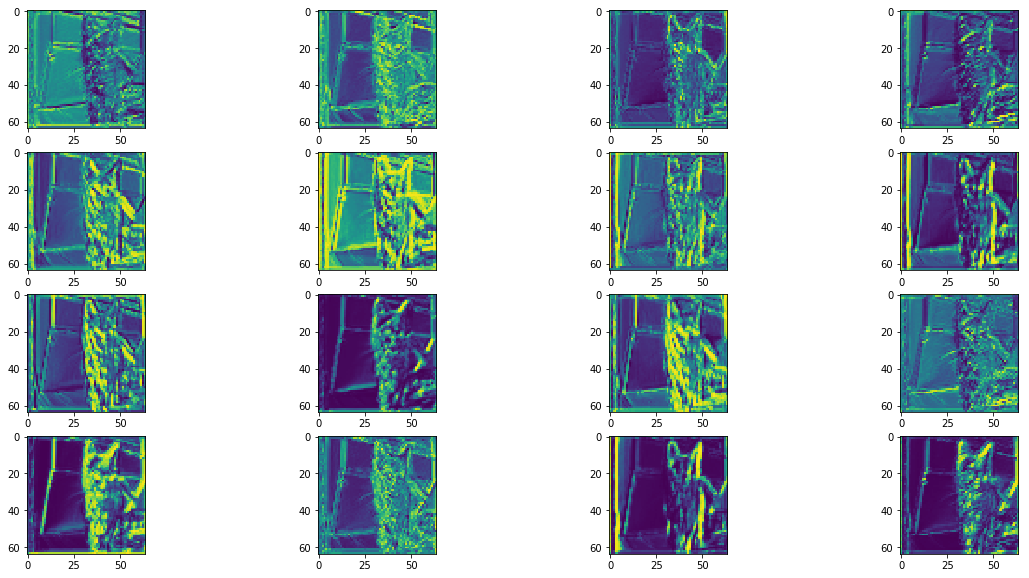

In [59]:
plt.figure(figsize=(20,10))
imid=12
for i in range(4):
    for j in range(4):
        plt.subplot(4,4,4*i+j+1)
        _ = plt.imshow(p1val[imid,:,:,4*i+j])
#plt.subplot(3,1,2)
#_ = plt.imshow(p2val[imid,:,:,15])
#plt.subplot(3,1,3)
#_ = plt.imshow(image_data[imid,:,:,0])

In [142]:
np.max(l4val, 0), np.max(l4val)

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.25261312e+08,
        5.00666099e+13, 0.00000000e+00, 0.00000000e+00, 6.02449408e+09,
        3.69496624e+13, 4.48465352e+14, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.24757699e+10,
        0.00000000e+00, 4.58234087e+13, 0.00000000e+00, 0.00000000e+00,
        1.48047462e+09, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.38362296e+10, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        9.87797389e+12, 8.59711078e+09, 1.42050654e+13, 0.00000000e+00,
        0.00000000e+00, 6.85523558e+09, 0.00000000e+00, 1.78282660e+10,
        0.00000000e+00, 2.90130342e+14, 0.00000000e+00, 0.00000000e+00,
        4.72784179e+09, 0.00000000e+00, 1.04554109e+12, 1.087494

In [136]:
print('l4val=\n',l4val, '\n sl4val=\n',sl4val, '\n logitvals=\n',logitvals, 
      '\n softmax=\n',softmax(sl4val), '\nlabels=\n', label_data)

l4val=
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
 sl4val=
 [[ 3.0755343e+17 -3.0755134e+17]
 [ 1.8990263e+17 -1.8990133e+17]
 [ 3.2260248e+17 -3.2260029e+17]
 [ 2.5357349e+17 -2.5357174e+17]
 [ 2.5847312e+17 -2.5847136e+17]
 [ 1.5361624e+17 -1.5361517e+17]
 [ 2.4924010e+17 -2.4923840e+17]
 [ 2.6150919e+17 -2.6150740e+17]
 [ 2.9790305e+17 -2.9790103e+17]
 [ 3.2085261e+17 -3.2085041e+17]
 [ 2.9893100e+17 -2.9892893e+17]
 [ 2.6935260e+17 -2.6935075e+17]
 [ 2.3476680e+17 -2.3476520e+17]
 [ 3.3472254e+17 -3.3472027e+17]
 [ 1.6882183e+17 -1.6882070e+17]
 [ 2.4693313e+17 -2.4693145e+17]
 [ 3.9208887e+17 -3.9208619e+17]
 [ 2.6142865e+17 -2.6142686e+17]
 [ 2.2788595e+17 -2.2788438e+17]
 [ 2.8930666e+17 -2.8930470e+17]
 [ 2.3196694e+17 -2.3196534e+17]
 [ 4.0089421e+17 -4.0089146e+17]
 [ 2.5403512e+17 -2.5403337e+17]
 [ 2.1784607e+17 -2.1784457e+17]
 [ 2.8287404e+17 -2.8287211e+17]


In [217]:
np.matmul(l4val, v0) + v1

array([[22889.773, 40725.15 ],
       [18520.268, 34514.45 ],
       [19011.277, 36095.05 ],
       [19551.87 , 35113.344],
       [11610.65 , 21409.072],
       [16451.42 , 32120.47 ],
       [13017.908, 25812.172],
       [26263.34 , 47783.37 ],
       [20432.14 , 34399.234],
       [16793.812, 34229.62 ],
       [18166.123, 32205.045],
       [19180.168, 34414.824],
       [15816.815, 30723.871],
       [21144.107, 42348.086],
       [10735.864, 20335.426],
       [16544.32 , 31519.326],
       [25584.818, 46852.723],
       [14937.173, 27766.35 ],
       [19551.771, 35318.68 ],
       [14384.9  , 26906.686],
       [22242.088, 43535.535],
       [11539.895, 21134.242],
       [21480.84 , 40343.785],
       [12473.098, 24979.457],
       [13801.464, 28207.166],
       [20581.025, 37914.227],
       [13192.833, 27972.297],
       [16154.934, 33876.906],
       [25355.438, 45547.934],
       [24105.863, 44509.44 ],
       [18025.883, 34531.492],
       [15167.671, 26336.95 ]], dtype=f

In [73]:
sess.run(init)
v1 = sess.run(grads, feed_dict={images: image_data, labels: label_data})
v2 = sess.run(g, feed_dict={images: image_data, labels: label_data})

In [ ]:
# Add histograms for trainable variables.
for var in tf.trainable_variables():
    tf.summary.histogram(var.op.name, var)

# Add histograms for gradients.
for grad, var in grads:
    if grad is not None:
        tf.summary.histogram(var.op.name + '/gradients', grad)

# Track the moving averages of all trainable variables.
variable_averages = tf.train.ExponentialMovingAverage(
    MOVING_AVERAGE_DECAY, global_step)
variables_averages_op = variable_averages.apply(tf.trainable_variables())

with tf.control_dependencies([apply_gradient_op, variables_averages_op]):
    train_op = tf.no_op(name='train')

In [41]:
testImagesData.shape

(2000, 128, 128, 1)

In [82]:
gsval= sess.run([global_step])
print(gsval)

[13046]


In [29]:
init = tf.global_variables_initializer()
num_epochs=90

#with tf.Session(config=tf.ConfigProto(allow_soft_placement=False, log_device_placement=True)) as sess:
sess = tf.InteractiveSession(config=tf.ConfigProto(allow_soft_placement=False, log_device_placement=True))
sess.run(init) 

In [30]:
print("Epoch \t,num batches \t avg loss \t, curr loss \t, accuracy \t, learning_rate")
##now test the model by running the inference on the test data...
validateSize=500
rand_indices = np.random.choice(np.arange(testImagesData.shape[0]), validateSize, replace=False)
validate_data = testImagesData[rand_indices, :, :, 0].reshape(-1, IM_HEIGHT,IM_WIDTH,1)
validate_label = testImagesLabel[rand_indices, :].reshape(-1,2)

for i in range(num_epochs):
    rand_indices = np.arange(len(train_filenames))
    np.random.shuffle(rand_indices)
    currloss=0
    avg_acc=0
    step=0
    for idx in range(0, len(rand_indices)-batch_size, batch_size):
        #if idx>1:
        #    break
        #print("idx=",idx)
        image_data = imagesData[rand_indices[idx:idx+batch_size], :, :, 0].reshape(batch_size, IM_HEIGHT,IM_WIDTH,1)
        label_data = imagesLabel[rand_indices[idx:idx+batch_size], :]

        _ = sess.run(apply_gradient_op, feed_dict={images: image_data, labels: label_data})
        currlossval, accopval = sess.run([lossval, acc_op], \
                                                 feed_dict={images: image_data, labels: label_data})
        currloss+=currlossval
        avg_acc += accopval
        step+=1

    avg_loss = currloss/step
    avg_acc = avg_acc/step
    if (i%3)==0:
        validate_inference, validate_loss, validate_accopval, lrval = sess.run([logits, lossval, acc_op, lr], \
                                                    feed_dict={images: validate_data, labels: validate_label})
        print(i, idx+1, avg_loss, currloss, avg_acc, accopval, validate_loss, validate_accopval, lrval)

##now test the model by running the inference on the test data...
testdata = testImagesData[:, :, :, 0].reshape(-1, IM_HEIGHT,IM_WIDTH,1)
testlabel = testImagesLabel[:, :].reshape(-1,2)
testinference, testloss, testaccopval = sess.run([logits, lossval, acc_op], \
                                                 feed_dict={images: testdata, labels: testlabel})
print("test loss=", testloss, testaccopval)

Epoch 	,num batches 	 avg loss 	, curr loss 	, accuracy 	, learning_rate
0 19937 0.6205209862822906 387.2050954401493 0.6483874198717948 0.78125 0.6052877 0.658 1e-04
3 19937 0.41998510007770395 262.0707024484873 0.8092447916666666 0.78125 0.4148712 0.814 1e-04
6 19937 0.25951797822012734 161.93921840935946 0.8938802083333334 0.8125 0.43682176 0.802 1e-04
9 19937 0.07368355893935913 45.978540778160095 0.9813201121794872 1.0 0.5389625 0.836 1e-04
12 19937 0.011321022103052551 7.0643177923047915 0.9993990384615384 1.0 0.75390464 0.84 8.8e-05
15 19937 0.009099076638775818 5.67782382259611 0.9993489583333334 1.0 0.9345653 0.796 8.8e-05
18 19937 0.0029871264723974143 1.8639669187759864 0.9999499198717948 1.0 1.0624177 0.81 8.8e-05
21 19937 0.0031726511492473574 1.979734317130351 0.9998497596153846 1.0 1.031669 0.828 7.743999e-05
24 19937 0.0005636570681789321 0.3517220105436536 0.9999499198717948 1.0 1.0995913 0.828 7.743999e-05
27 19937 0.002317691916850424 1.4462397561146645 0.99989983974

In [32]:
sess.close()

In [29]:
sum(testinference[:,0]), sum(testinference[:,1]), testinference, softmax(testinference), testlabel.shape

(-1180.086400769651, 167.00737142562866, array([[-14.444814  ,  13.752747  ],
        [-13.127912  ,  12.583044  ],
        [-13.875213  ,  13.129477  ],
        ...,
        [ 16.738258  , -17.762047  ],
        [ -0.48167905,  -0.20984006],
        [ -7.9296045 ,   6.733541  ]], dtype=float32), array([[5.6748654e-13, 1.0000000e+00],
        [6.8213989e-12, 1.0000000e+00],
        [1.8707377e-12, 1.0000000e+00],
        ...,
        [1.0000000e+00, 1.0392208e-15],
        [4.3245569e-01, 5.6754434e-01],
        [4.2842697e-07, 9.9999952e-01]], dtype=float32), (1000, 2))

In [30]:
testlogits = softmax(testinference)

In [31]:
testlogits[:10], testlabel[:10]

(array([[5.6748654e-13, 1.0000000e+00],
        [6.8213989e-12, 1.0000000e+00],
        [1.8707377e-12, 1.0000000e+00],
        [2.2915834e-22, 1.0000000e+00],
        [1.6286836e-26, 1.0000000e+00],
        [4.8763419e-17, 1.0000000e+00],
        [6.3214502e-22, 1.0000000e+00],
        [8.3210289e-05, 9.9991679e-01],
        [9.9208039e-01, 7.9196598e-03],
        [9.5704211e-10, 1.0000000e+00]], dtype=float32), array([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]]))

[2.8123495e-21 1.0000000e+00]


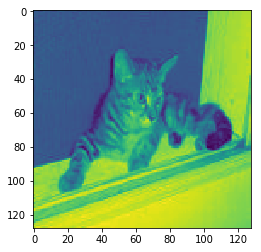

In [178]:
imid=28
plt.imshow(testdata[imid,:,:,0])
print(testlogits[imid,:])

In [63]:
logitvals = sess.run(logits, feed_dict={images:testdata[imid:imid+1,:,:,:]})

In [243]:
mod_image = testdata[imid,:,:,0] + 10*(np.random.rand(128,128)-0.5) #- 20*np.ones((128,128)) #

[[2.7065273e-06 9.9999726e-01]] [[-6.766672  6.053169]]


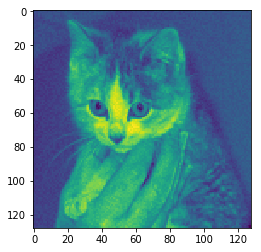

In [244]:
plt.imshow(mod_image)
mod_op = sess.run(logits, feed_dict={images:mod_image.reshape(-1,128,128,1)})
print(softmax(mod_op), mod_op)

In [245]:
orig_image = mod_image.reshape(-1,128,128,1)

In [252]:
imid=2 #7
delta=10
orig_op = sess.run(logits, feed_dict={images:orig_image})
orig_logits = -np.log(softmax(orig_op))
inp_grad = np.zeros((128,128))
mod_image = np.copy(orig_image[0,:,:,0])
prev_x, prev_y=0,0
mod_image[prev_x,prev_y]+=delta
for px in range(128):
    for py in range(128):
        mod_image[prev_x,prev_y]-=delta
        mod_image[px,py]+=delta
        m1 = mod_image.reshape(-1,128, 128, 1)
        logitvals = sess.run(logits, feed_dict={images:m1})
        inp_grad[px,py] = -np.log(softmax(logitvals))[0][1] - orig_logits[0][1]
        prev_x,prev_y = px, py
    if (px%10)==0: print(px, end=' ')
print(inp_grad, np.sign(inp_grad))
mod_image = testdata[imid,:,:,0] + np.sign(inp_grad)
m1 = mod_image.reshape(-1,128,128,1)
mod_op = sess.run(logits, feed_dict={images:m1})
print(softmax(orig_op), softmax(mod_op))

0 10 20 30 40 50 60 70 80 90 100 110 120 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
  -1.19209744e-07 -1.19209744e-07]
 [-1.19209744e-07  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00 -1.19209744e-07]
 ...
 [ 0.00000000e+00 -1.19209744e-07  0.00000000e+00 ... -2.38419261e-07
  -1.19209744e-07 -1.19209744e-07]
 [ 0.00000000e+00  0.00000000e+00 -1.19209744e-07 ...  0.00000000e+00
   1.19209517e-07  3.57628778e-07]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   1.19209517e-07  0.00000000e+00]] [[ 0.  0.  0. ...  0. -1. -1.]
 [-1.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0. -1.]
 ...
 [ 0. -1.  0. ... -1. -1. -1.]
 [ 0.  0. -1. ...  0.  1.  1.]
 [ 0.  0.  0. ...  0.  1.  0.]]
[[2.7065273e-06 9.9999726e-01]] [[1.0000000e+00 8.0494855e-10]]


In [224]:
mod_image.shape, orig_image.shape
mod_image = np.copy(orig_image[0,:,:,0])

In [225]:
mod_image.shape

(128, 128)

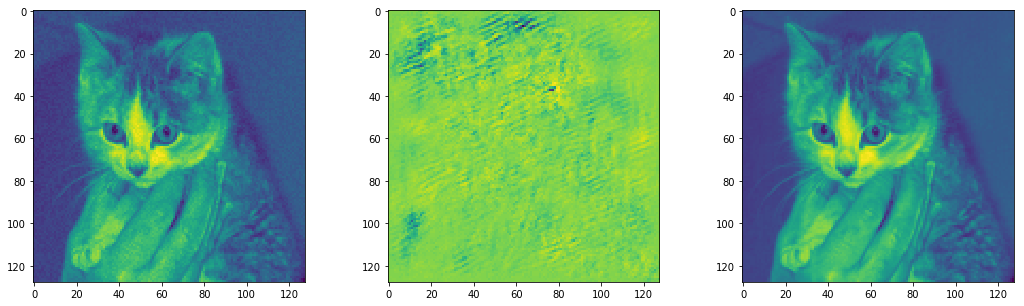

In [247]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.imshow(orig_image[0,:,:,0]) #testdata[imid,:,:,0]
plt.subplot(1,3,2)
plt.imshow(inp_grad)
plt.subplot(1,3,3)
plt.imshow(mod_image)

In [249]:
orig_op = sess.run(logits, feed_dict={images:orig_image})
mod_op = sess.run(logits, feed_dict={images:mod_image.reshape(-1, 128, 128,1)})
print(softmax(orig_op), softmax(mod_op))

[[2.7065273e-06 9.9999726e-01]] [[9.999994e-01 5.469827e-07]]


In [44]:
np.argmax(testlogits[:num_testfiles,:],1),sum(np.argmax(testlogits[:num_testfiles,:],1))

(array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
        1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
        0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
        1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 

In [75]:
np.argmax(testlabel[:num_testfiles,:],1), sum(np.argmax(testlabel[:num_testfiles,:],1))

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [76]:
np.argmax(testlogits[num_testfiles:,:],1),sum(np.argmax(testlogits[num_testfiles:,:],1))

(array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
        0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(np.argmax(testlabel,1), np.argmax(testlogits,1), normalize=True, sample_weight=None)

0.7695

In [140]:
image_data.shape, currloss, label_data

((32, 128, 128, 1), 69.68204164505005, array([[0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.]]))

In [22]:
rand_indices = np.arange(len(train_filenames))
np.random.shuffle(rand_indices)
image_data = imagesData[rand_indices[0:batch_size], :, :, 0].reshape(batch_size, IM_WIDTH,IM_HEIGHT,1)
label_data = imagesLabel[rand_indices[0:batch_size], :]

In [23]:
init = tf.global_variables_initializer()
#sess = tf.Session(config=tf.ConfigProto(
#      allow_soft_placement=True, log_device_placement=True))

with tf.Session(config=tf.ConfigProto(allow_soft_placement=False, log_device_placement=True)) as sess:
    sess.run(init)
    print("initialized...")
    print("now inferring...")
    for i in range(10):
        #cetropy = sess.run(cross_entropy_mean, feed_dict={images: image_data, labels: label_data})
        sftmaxlin = sess.run(logits, feed_dict={images: image_data})
        #currloss = sess.run(lossval, feed_dict={images: image_data, labels: label_data})
        print("infered ",i, " times")

initialized...
now inferring...
infered  0  times
infered  1  times
infered  2  times
infered  3  times
infered  4  times
infered  5  times
infered  6  times
infered  7  times
infered  8  times
infered  9  times


In [116]:
cetropy, sftmaxlin, currloss, label_data

(17.66, array([[-16.95  ,  -3.08  ],
        [-21.02  ,  -0.79  ],
        [-26.    ,   3.975 ],
        [-15.375 ,  -3.209 ],
        [-17.86  ,   3.904 ],
        [-23.02  ,   4.66  ],
        [-18.56  ,   0.801 ],
        [-20.14  ,   8.19  ],
        [-16.84  ,   0.6953],
        [-25.17  ,  -1.405 ],
        [-26.53  ,   2.072 ],
        [-20.81  ,  -0.9565],
        [-25.84  ,   6.684 ],
        [-16.58  ,   8.    ],
        [-24.16  ,   2.043 ],
        [-25.38  ,   3.857 ],
        [-27.77  ,   8.2   ],
        [-21.92  ,   3.719 ],
        [-18.36  ,  -3.045 ],
        [-26.14  ,   3.4   ],
        [-26.81  ,   1.618 ],
        [-19.3   ,  -2.805 ],
        [-15.51  ,   3.838 ],
        [-20.69  ,   4.332 ],
        [-20.4   ,   4.832 ],
        [-16.39  ,   2.703 ],
        [-25.14  ,   3.537 ],
        [-23.    ,   4.566 ],
        [-28.69  ,   4.027 ],
        [-25.56  ,   1.566 ],
        [-27.11  ,   6.406 ],
        [-26.72  ,   4.715 ]], dtype=float16), inf, array([[1.,

In [31]:
image_data.shape, label_data.shape

((32, 256, 256, 1), (32, 2))

In [ ]:
def set_inputs():
    """Construct distorted input for CIFAR training using the Reader ops.
    Returns:
    images: Images. 4D tensor of [batch_size, IMAGE_SIZE, IMAGE_SIZE, 3] size.
    labels: Labels. 1D tensor of [batch_size] size.
    Raises:
    ValueError: If no data_dir
    """
    if not FLAGS.data_dir:
        raise ValueError('Please supply a data_dir')
    data_dir = os.path.join(FLAGS.data_dir, 'cifar-10-batches-bin')
    images, labels = retrieve_inputs(data_dir=data_dir,
                                     batch_size=FLAGS.batch_size)
    if FLAGS.use_fp16:
        images = tf.cast(images, tf.float16)
        labels = tf.cast(labels, tf.float16)
        
    if shuffle:
        images, label_batch = tf.train.shuffle_batch(
            [image, label],
            batch_size=batch_size,
            num_threads=num_preprocess_threads,
            capacity=min_queue_examples + 3 * batch_size,
            min_after_dequeue=min_queue_examples)
    else:
        images, label_batch = tf.train.batch(
            [image, label],
            batch_size=batch_size,
            num_threads=num_preprocess_threads,
            capacity=min_queue_examples + 3 * batch_size)

    # Display the training images in the visualizer.
    tf.summary.image('images', images)

    #return images, labels
    return images, tf.reshape(label_batch, [batch_size])

In [22]:
def train():
    with tf.Graph().as_default():
        global_step = tf.train.get_or_create_global_step()
    
        with tf.device('/cpu:0'):
            images, labels = set_inputs()

            # Build a Graph that computes the logits predictions from the
            # inference model.
            logits = inference_model(images)

            # Calculate loss.
            loss = loss(logits, labels)

            # Build a Graph that trains the model with one batch of examples and
            # updates the model parameters.
            train_op = train_network(loss, global_step)

            class _LoggerHook(tf.train.SessionRunHook):
                """Logs loss and runtime."""

                def begin(self):
                    self._step = -1
                    self._start_time = time.time()

                def before_run(self, run_context):
                    self._step += 1
                    return tf.train.SessionRunArgs(loss)  # Asks for loss value.

                def after_run(self, run_context, run_values):
                    if self._step % FLAGS.log_frequency == 0:
                        current_time = time.time()
                        duration = current_time - self._start_time
                        self._start_time = current_time

                        loss_value = run_values.results
                        examples_per_sec = FLAGS.log_frequency * FLAGS.batch_size / duration
                        sec_per_batch = float(duration / FLAGS.log_frequency)

                        format_str = ('%s: step %d, loss = %.2f (%.1f examples/sec; %.3f '
                                    'sec/batch)')
                        print (format_str % (datetime.now(), self._step, loss_value,
                                   examples_per_sec, sec_per_batch))

            with tf.train.MonitoredTrainingSession(
                checkpoint_dir=FLAGS.train_dir,
                hooks=[tf.train.StopAtStepHook(last_step=FLAGS.max_steps),
                       tf.train.NanTensorHook(loss),
                       _LoggerHook()],
                config=tf.ConfigProto(log_device_placement=FLAGS.log_device_placement)) as mon_sess:
                while not mon_sess.should_stop():
                    mon_sess.run(train_op)
